<div style='font-size:225%; font-weight:bold; text-align: center'>Quantum Multiplication Calculator (2-bit Inputs)</div>

# Introduction
This is the result of the <a href='Quantum Multiplication Calculator Builder.ipynb'>Quantum Multiplication Calculator Builder</a> with nbits set to 2 (nbits = 2).

# Implement the Program with States Inputted by a User

<div style='margin:2.5% 0'>Here is the equation with A and B as inputs:</div>
<div style='font-size:225%; font-weight:bold; text-align: center; margin:2.5% 0'>A * B = P (Product)</div>

In [1]:
# A*B = P

nbits = 2
A, B = 2, 3

inputsNum = nbits*2

# Import Modules

Import modules, including several Qiskit modules

In [2]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit_aer import AerSimulator

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

# Define Functions

Functions that are general but customary should be defined. These functions are considered customary since they may or may not be standard functions and methods provided in default by Python.

Here are the functions:
<ol>

<li>group() function<br>
<div>
    
This function can be used for grouping a list into a list of lists with the specified length length of the sublists.<br><br>
For instance, an array [2, 8, 3, 5, 9] can be grouped into [[2, 8], [3, 5], [9]] if group(array, 2) is called.

However, if the length of the list is not the multiple of the length of the sublists, the last sublist will have the nmber of the remaining items in the original array. In other words, the length of the last sublist will be the remainder of array_length divided by sub_array_length, which can be calculated as follows (also using % modulo operator in Python):

Last_Sub_array_length
    = (array_length) mod (sub_array_length)
    = (array_length) % (sub_array_length)

In the example above:
array_length = 5
sub_array_length = 2
    
(array_length) mod (sub_array_length)
    = (array_length) % (sub_array_length)
    = 5 % 2
    = 1

The last array [9] in the grouped array [[2, 8], [3, 5], [9]] has only a length of 1.
<br><br>

</div>
</li>

<li>afmtsd() function
<div>
"afmtsd" stands for "Add for making the same digits".<br>
This function can add some letters or numbers to the front for various purposes, including sorting purposes. For example, if one desires to sort an array ['00011', '100'], making '100' (3 digits) to become '00100' (5 digits) can make use of this function by calling afmtsd(['00011', '100'], '0', 5).
<br><br>
</div>
</li>

<li>dstatial() function
<div>
"dstatial" stands for "Do something to all things in a list".<br>
This function is similar if one calls list(map()) function. It means applying a function to all items in the list. This function comes in handy when one does not want to avoid using too many parentheses when calling the list(map()) function.
</div>
</li>

</ol>

In [3]:
def group(list, subListLen):
    if subListLen != 0:
        grouped_list = []
        
        try: len_list = len(list)
        except TypeError as errordesc:
            if repr(errordesc) == 'TypeError("object of type \'int\' has no len()")':
                len_list = subListLen+1
        
        for a in range(0, len_list, int(subListLen)):
            if type(list) == type(0): grouped_list.append('')
            else: grouped_list.append(list[a:a+subListLen])
        
        if grouped_list == []: grouped_list.append('')
        
        return grouped_list
        
    else:
        pass

def afmtsd(the_list_original, chara, ndigits):
    # afmtsd stands for "Add for making the same digits"
    the_list = list(the_list_original)
    a = [chara]*(ndigits-len(the_list)) + the_list
    
    if type(the_list_original) == type(''): return ''.join(a)
    else: return a
      
def dstatial(the_function,the_list):
    # "Do something to all things in a list"
    the_new_list = []
    
    for tla in the_list:
        the_new_list.append(the_function(tla))
        
    return the_new_list

# Create a Quantum Circuit and Paste All Implementations

## mCirc stands for "Multiplier Circuit"

A Quantum Circuit is created and pasted with all its implementations.<br/>
Then, paste the constructed circuit from the <a href='Quantum Multiplication Calculator Builder.ipynb'>Quantum Multiplication Calculator Builder</a>.

In [4]:
mCirc = QuantumCircuit(20, 4)

mCirc.append(CXGate(), [0, 8])
mCirc.append(XGate(), [8])
mCirc.append(CXGate(), [1, 9])
mCirc.append(XGate(), [9])
mCirc.append(CXGate(), [2, 10])
mCirc.append(XGate(), [10])
mCirc.append(CXGate(), [3, 11])
mCirc.append(XGate(), [11])
mCirc.append(MCXGate(num_ctrl_qubits=4), [0, 1, 2, 3, 12])
mCirc.append(XGate(), [12])
mCirc.append(MCXGate(num_ctrl_qubits=3), [0, 2, 9, 13])
mCirc.append(XGate(), [13])
mCirc.append(MCXGate(num_ctrl_qubits=3), [0, 2, 11, 14])
mCirc.append(XGate(), [14])
mCirc.append(MCXGate(num_ctrl_qubits=3), [1, 2, 8, 15])
mCirc.append(XGate(), [15])
mCirc.append(MCXGate(num_ctrl_qubits=3), [0, 3, 10, 16])
mCirc.append(XGate(), [16])
mCirc.append(MCXGate(num_ctrl_qubits=3), [0, 3, 9, 17])
mCirc.append(XGate(), [17])
mCirc.append(MCXGate(num_ctrl_qubits=3), [1, 2, 11, 18])
mCirc.append(XGate(), [18])
mCirc.append(CCXGate(), [1, 3, 19])
mCirc.append(XGate(), [19])
mCirc.append(CXGate(), [12, 4])
mCirc.append(XGate(), [4])
mCirc.append(CCXGate(), [13, 14, 5])
mCirc.append(XGate(), [5])
mCirc.append(MCXGate(num_ctrl_qubits=4), [15, 16, 17, 18, 6])
mCirc.append(XGate(), [6])
mCirc.append(CXGate(), [19, 7])
mCirc.append(XGate(), [7])
mCirc.measure([4], [3])
mCirc.measure([5], [2])
mCirc.measure([6], [1])
mCirc.measure([7], [0])

In [5]:
# Determine whether new Initialization Gates are needed to be inserted or not
inputDet = sum([circInst.operation.name == 'x' or circInst.operation.name == 'id' for circInst in mCirc.data[:inputsNum]])

# If the Initialization Gates do not exists or are incomplete, then insert them.
if inputDet < inputsNum:
    initGates = []
    qreg = mCirc.data[0].qubits[0].register

    for inputIndex in range(inputsNum):
        initGates.append(CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                           qubits=(Qubit(qreg, inputIndex),),
                                           clbits=()))

    mCirc.data = initGates + mCirc.data

mCirc.draw(output='mpl')

A_Bin = afmtsd(bin(A)[2:], '0', nbits)
B_Bin = afmtsd(bin(B)[2:], '0', nbits)

BinInputs = A_Bin + B_Bin

backend = AerSimulator(method='matrix_product_state')

for inputIndex in range(len(BinInputs)):
    # Binary Input
    BinInput = int(BinInputs[inputIndex])

    # BinInput can be 0 or 1, translating to "i" or "x" gate, respectively
    name = ['id', 'x'][BinInput]

    mCirc.data[inputIndex].operation.name = name

C:\Users\mulia\AppData\Local\Temp\ipykernel_560\1959996456.py:7: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.register`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qreg = mCirc.data[0].qubits[0].register


mCirc.data = mCircData

In [14]:
backend = AerSimulator(method='matrix_product_state')

try:
    result = execute(mCirc, backend=backend).result()
    counts = result.get_counts()

    countsFinal = dstatial(int, list(list(counts)[0]))
    countsFinalNp = np.array(countsFinal)

    Product_mCirc = np.sum(2**np.arange(inputsNum)[::-1]*countsFinalNp)
    #mCirc.measure(np.arange(inputsNum)+inputsNum, range(inputsNum)[::-1])

    print(f'Result: {A}*{B} = {Product_mCirc}', '', countsFinal, sep='\t')
        
except QiskitError:
    # Get error message by using traceback.format_exc()
    errmsg = format_exc()
    
    # If the error is really Insufficient memory problem, then output it using file=sys.stderr in the print() function
    if "ERROR: Insufficient memory to run circuit circuit-120 using the statevector simulator." in errmsg:
        print('\n'+errmsg, file=sys.stderr)
        
    else:
        raise

Result: 2*3 = 6		[0, 1, 1, 0]


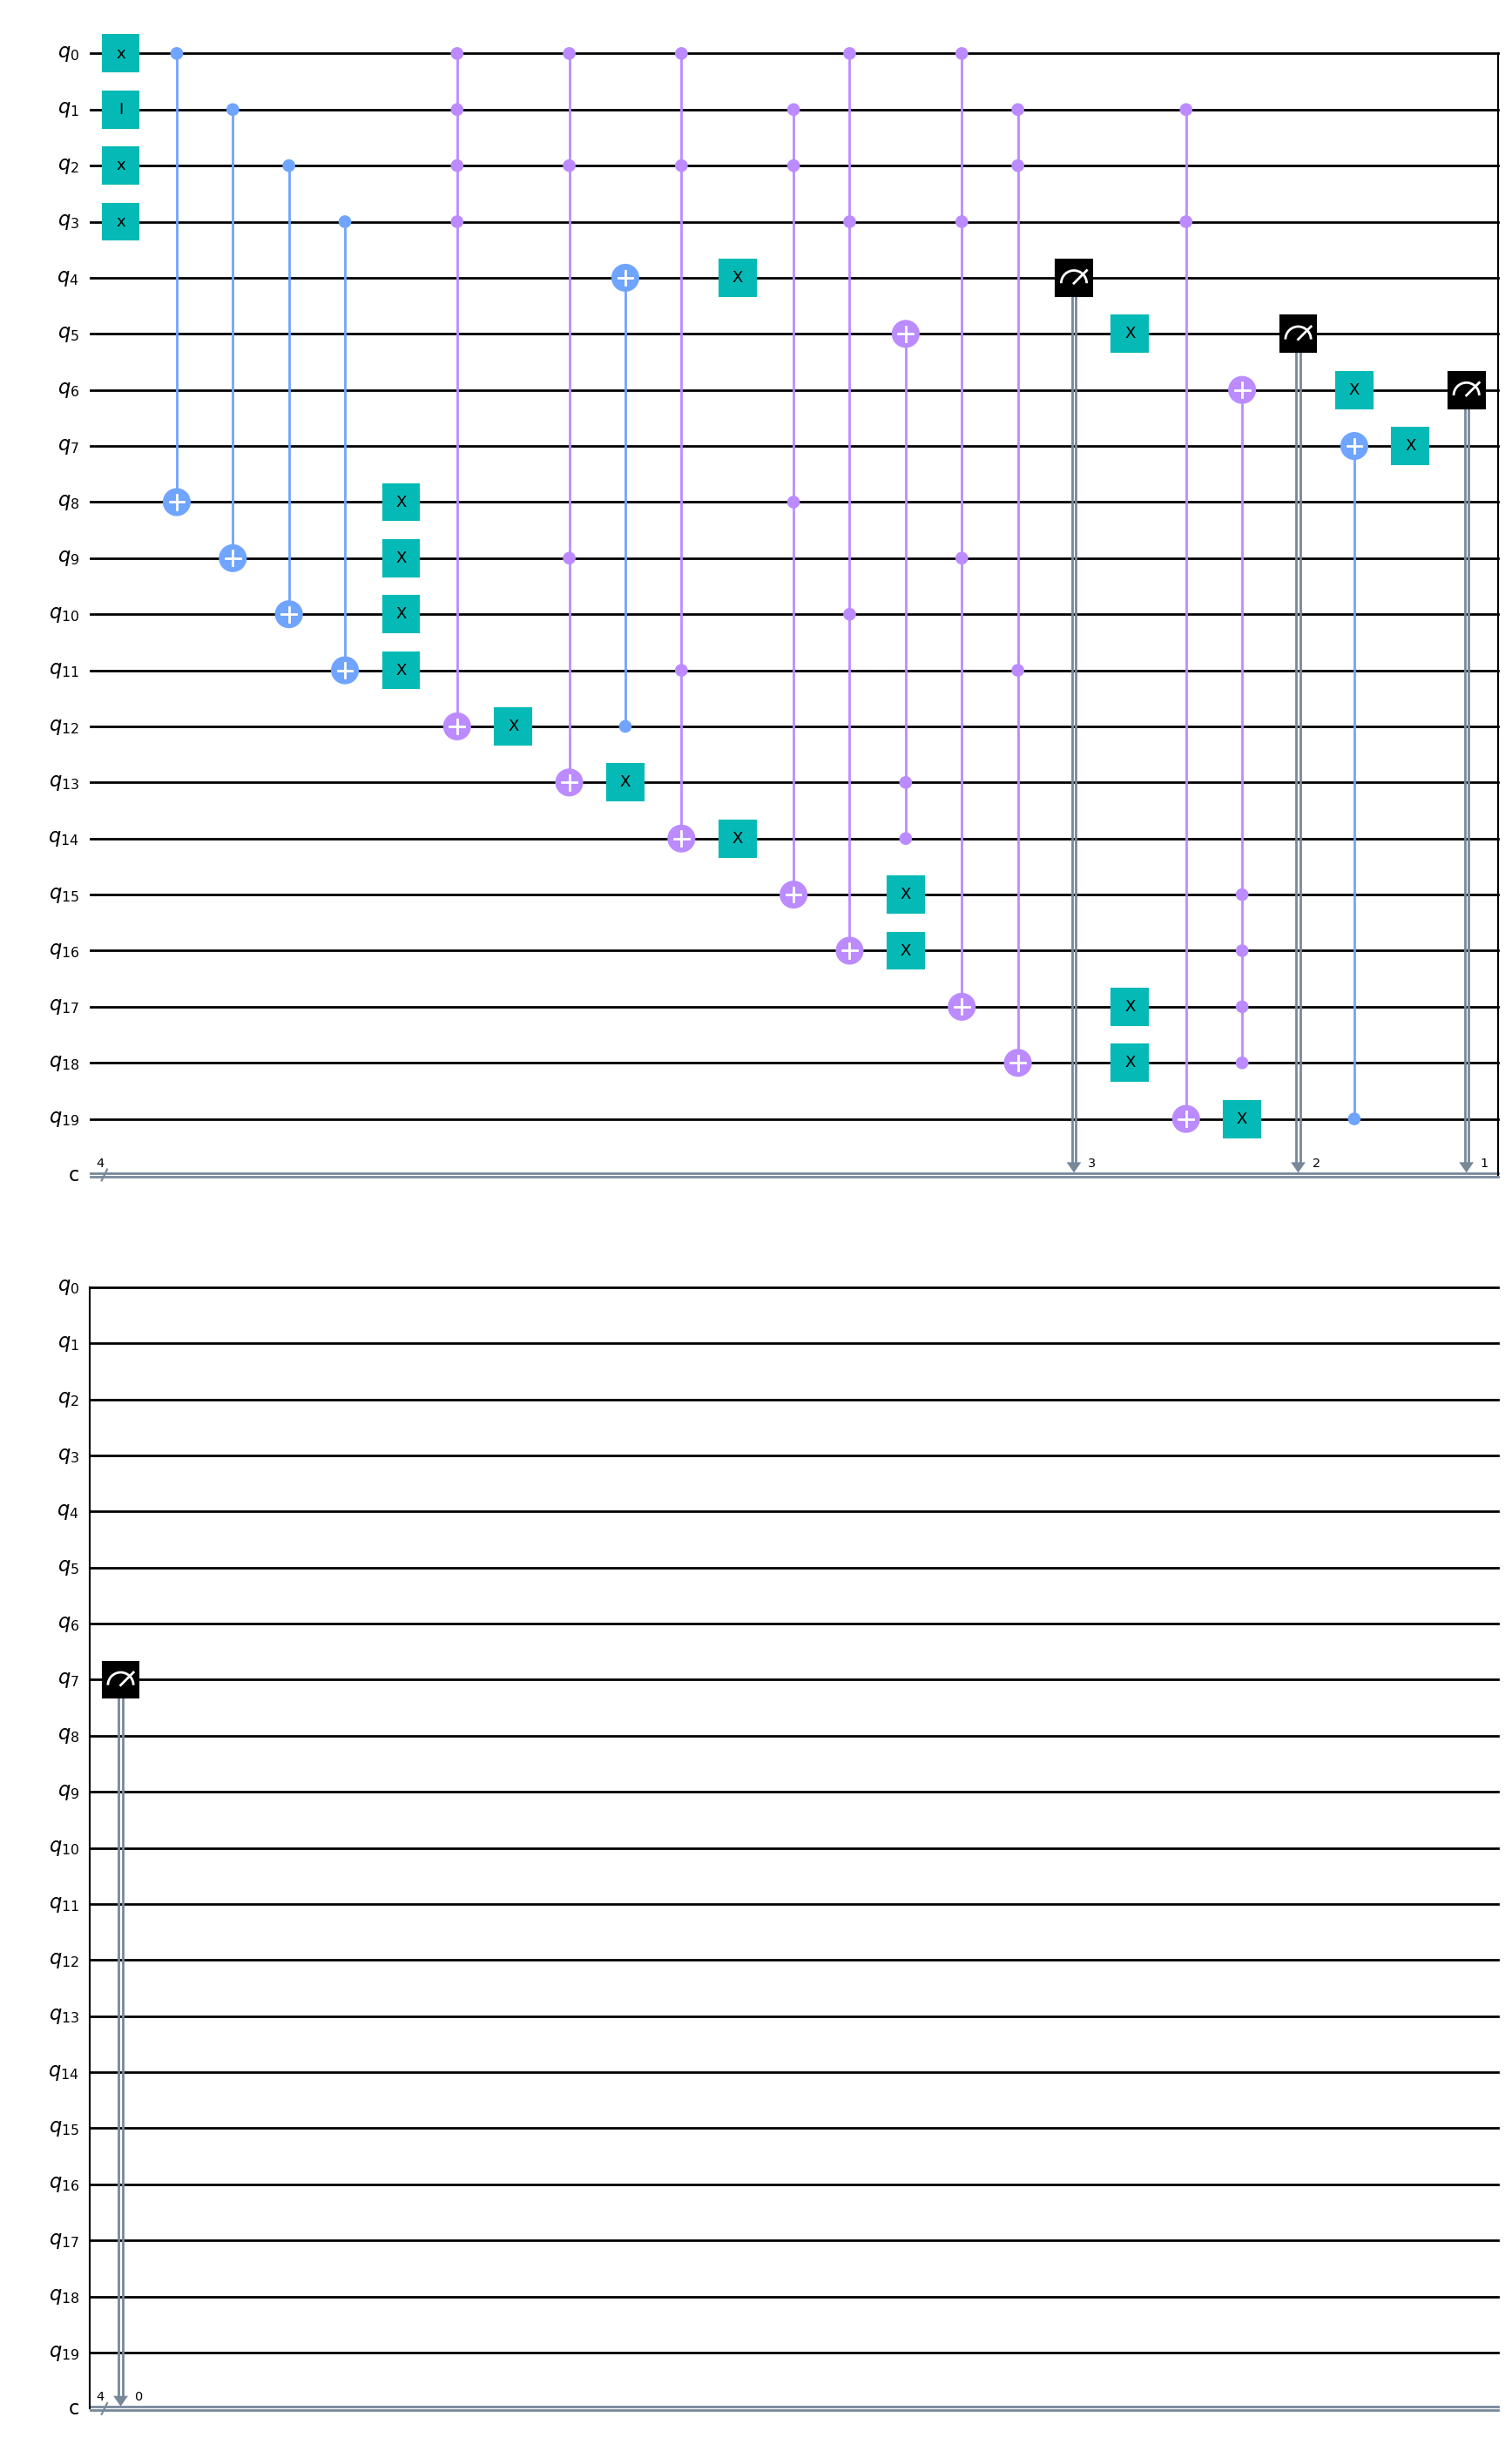

In [7]:
mCirc.draw(output='mpl')